<div style="text-align : center;">

<div style="text-align :center;">
    <h1> <b> Modul VI </b> </h1>
    <h1> <b> Finger Simulation Experiment 3</b> </h1>
    <h3> (Rizki Rahman Maulana) </h3>
</div>

## **Import Libary yang Diperlukan**

In [3]:
import cv2 as cv
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math

Mengimpor beberapa library seperti `OpenCV (cv2)` untuk pengolahan citra, `NumPy (np)` untuk operasi matematika, `Pandas (pd)` untuk analisis data, `Matplotlib (plt)` untuk visualisasi data, serta modul `os` dan `csv` untuk operasi file.

## **Data Understanding**

#### **Jumlah Data**

Dalam proyek ini, kami menggunakan dataset yang terdiri dari gambar sidik jari. Total jumlah data yang digunakan adalah 2000 gambar, dengan distribusi yang merata di lima kategori berbeda. Setiap kategori memiliki 400 gambar. Kategori tersebut diidentifikasi berdasarkan jari tangan yang berbeda: jari1, jari2, jari3, jari4, dan jari5.

#### **Jumlah Kelas**

Dataset ini terbagi menjadi lima kelas, yang masing-masing mewakili jumlah jari tangan:

- jari1
- jari2
- jari3
- jari4
- jari5

#### **Cara Mendapatkan Data**

Cara Mendapatkan Data
Data sidik jari ini disimpan dalam struktur direktori yang berisi subdirektori untuk setiap jari. Setiap subdirektori berisi lebih dari 400 gambar sidik jari yang berkaitan dengan jari tersebut. Proses memuat data dilakukan dengan membaca gambar dari setiap subdirektori, mengubah ukurannya menjadi ukuran yang seragam, dan menyimpan gambar-gambar tersebut beserta label yang sesuai (nama subdirektori).

Berikut adalah langkah-langkah detail yang kami lakukan untuk mendapatkan dan memproses data:

##### 1. Memuat Gambar dan Label

Kami membuat fungsi `load_images_with_labels` yang memuat gambar dari subdirektori yang berbeda. Fungsi ini membaca setiap gambar dalam mode grayscale, mengubah ukurannya menjadi 150x150 piksel, dan menyimpan gambar-gambar tersebut dalam array data serta label yang sesuai dalam array labels.

In [4]:
def load_images_with_labels(base_folder, target_size=(150, 150)):
    data = []
    labels = []
    fingers = ['finger_1', 'finger_2', 'finger_3', 'finger_4', 'finger_5']
    
    for finger in fingers:
        folder_path = os.path.join(base_folder, finger)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv.resize(img, target_size)
                data.append(img_resized)
                labels.append(finger)
    
    return np.array(data), np.array(labels)

# Penggunaan
base_folder = 'finger'
data, labels = load_images_with_labels(base_folder, target_size=(150, 150))


Kode diatas menjabarkan fungsi `load_images_with_labels` membantu memuat gambar-gambar dari folder-folder di dalam sebuah direktori dasar dan menetapkan label berdasarkan nama folder. Kode tersebut menentukan daftar folder yang berisi gambar-gambar, lalu membaca setiap gambar menggunakan `OpenCV` dan mengubah ukurannya sesuai kebutuhan. Saat membaca setiap gambar, dan juga mengumpulkan labelnya berdasarkan nama folder tempat gambar tersebut berada. Data gambar dan label dikumpulkan dalam dua array terpisah: data untuk gambar-gambar dan labels untuk labelnya. 

##### 2. Eksplorasi Data

Setelah memuat data, kami melakukan eksplorasi data untuk memahami karakteristik dataset. Ini termasuk menghitung jumlah total data dan distribusi per kategori, serta menganalisis karakteristik gambar seperti background, noise, dan pencahayaan.

In [5]:
# Menghitung jumlah total data dan distribusinya di setiap kategori
def data_distribution(labels):
    distribution = pd.Series(labels).value_counts()
    return distribution

# Mendapatkan distribusi data
distribution = data_distribution(labels)
print('Jumlah total data: ', len(labels))
print('Distribusi data per kategori:\n', distribution)

Jumlah total data:  2099
Distribusi data per kategori:
 finger_1    422
finger_4    420
finger_2    419
finger_3    419
finger_5    419
Name: count, dtype: int64


Kode diatas memuat sebuah fungsi `data_distribution(labels)` yang menerima sebuah daftar label dan mengembalikan distribusi label tersebut dalam bentuk `Pandas Series`, yang menghitung jumlah kemunculan setiap label. Fungsi tersebut kemudian dipanggil dengan daftar label yang diberikan untuk menghasilkan distribusi data. Hasilnya dicetak dengan menampilkan jumlah total data dalam daftar label, diikuti dengan distribusi data per kategori yang ditampilkan dalam bentuk `Pandas Series`.

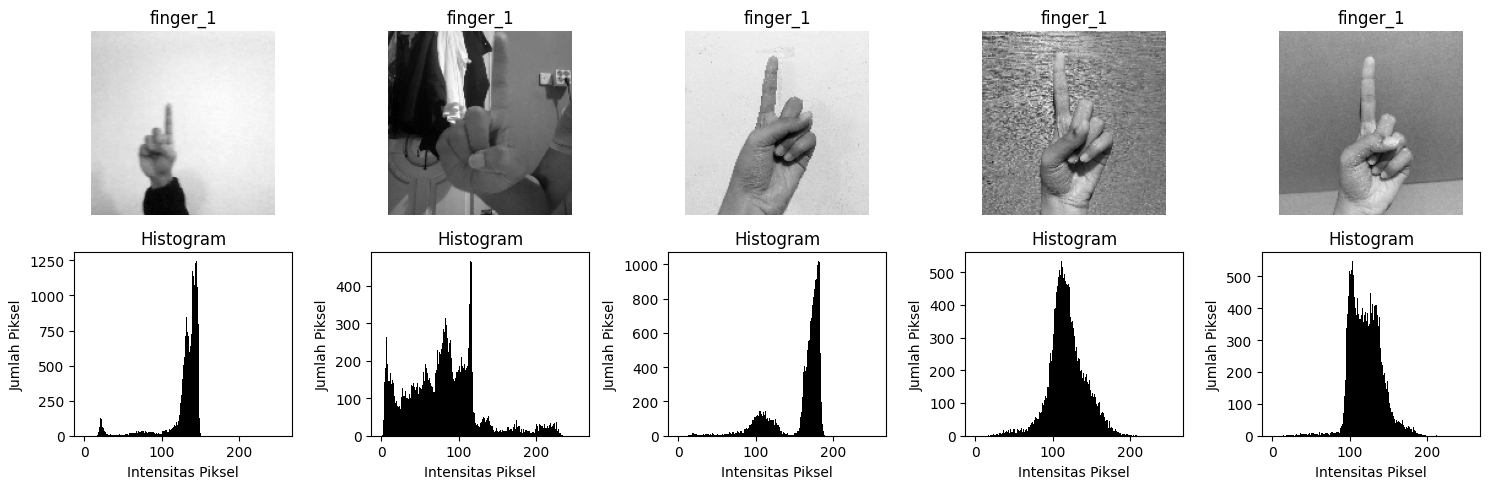

In [6]:
# Menampilkan sampel gambar dan histogram intensitas piksel
def plot_samples_and_histograms(data, labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    
    for i in range(num_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(data[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
        
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.hist(data[i].ravel(), bins=256, range=[0, 256], color='black')
        plt.title('Histogram')
        plt.xlabel('Intensitas Piksel')
        plt.ylabel('Jumlah Piksel')
    
    plt.tight_layout()
    plt.show()

# Plot sampel gambar dan histogram
plot_samples_and_histograms(data, labels)


##### 3. Visualisasi Distribusi Data

Kami juga membuat visualisasi distribusi data untuk melihat jumlah data per kategori dan memastikan bahwa dataset terdistribusi secara merata.

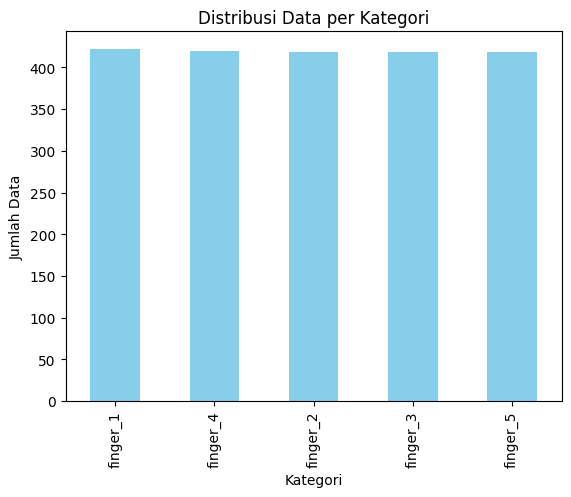

In [7]:
# Visualisasi distribusi data
def plot_data_distribution(distribution):
    distribution.plot(kind='bar', color='skyblue')
    plt.title('Distribusi Data per Kategori')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah Data')
    plt.show()

# Plot distribusi data
plot_data_distribution(distribution)


## **Data Preparation**

### **Image Augmentation**

#### **Teknik yang Digunakan**

Teknik yang akan digunakan adalah rotasi dengan sudut 90, 180, dan 270 derajat. Setiap gambar asli akan menghasilkan tiga gambar baru, sehingga memperkaya dataset dengan variasi yang berbeda dari setiap gambar.

Alasan Penggunaan Teknik Rotasi
1. Variasi Data
   
   Dengan melakukan rotasi, kita dapat menciptakan variasi pada dataset yang dapat membantu model dalam generalisasi dan mengenali pola yang berbeda.
2. Keseragaman Arah
    
   Rotasi gambar dapat membantu dalam mengatasi masalah keseragaman arah pada dataset yang mungkin mempengaruhi performa model.
3. Menghindari Overfitting
   
   Augmentasi data dengan rotasi dapat membantu dalam menghindari overfitting dengan memperkenalkan variasi yang lebih luas pada data latih.

#### **Impelementasi**

In [8]:
# Fungsi untuk melakukan rotasi gambar secara manual
def rotate_image(image, angle):
    if angle not in [90, 180, 270]:
        raise ValueError("Angle must be 90, 180, or 270 degrees")
    
    if angle == 90:
        return np.rot90(image, k=1)
    elif angle == 180:
        return np.rot90(image, k=2)
    elif angle == 270:
        return np.rot90(image, k=3)

Kode diatas adalah sebuah fungsi untuk melakukan rotasi gambar secara manual dengan sudut yang ditentukan. Pertama, fungsi memeriksa apakah sudut yang dimasukkan adalah 90, 180, atau 270 derajat. Jika tidak, kode akan menghasilkan `ValueError`. Jika sudut sesuai, fungsi menggunakan fungsi `np.rot90` dari `NumPy` untuk memutar gambar sesuai dengan kebutuhan. Jika sudut adalah 90, maka gambar diputar sekali; untuk sudut 180, gambar diputar dua kali; dan untuk sudut 270, gambar diputar tiga kali.

In [9]:
# Augmentasi gambar dengan rotasi
augmented_data = []
augmented_labels = []

for img, label in zip(data, labels):
    # Tambahkan gambar asli
    augmented_data.append(img)
    augmented_labels.append(label)
    
    # Rotasi 90 derajat
    rotated_90 = rotate_image(img, 90)
    augmented_data.append(rotated_90)
    augmented_labels.append(label)
    
    # Rotasi 180 derajat
    rotated_180 = rotate_image(img, 180)
    augmented_data.append(rotated_180)
    augmented_labels.append(label)
    
    # Rotasi 270 derajat
    rotated_270 = rotate_image(img, 270)
    augmented_data.append(rotated_270)
    augmented_labels.append(label)

Kode diatas melakukan augmentasi data gambar dengan rotasi. Pertama, kode menginisialisasi list untuk menyimpan gambar dan label baru. Kemudian, untuk setiap gambar dalam dataset, kode menambahkan gambar asli ke dalam list, lalu melakukan rotasi sebesar 90, 180, dan 270 derajat menggunakan fungsi rotate_image. Setiap versi gambar yang dirotasi ditambahkan ke dalam list juga, bersama dengan label yang sesuai.

In [10]:
# Konversi kembali ke array numpy
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

Kode diatas mengkonversi list `augmented_data` dan `augmented_labels` kembali menjadi array `NumPy`. Dengan demikian, data gambar yang sudah dirotasi dan labelnya siap digunakan untuk proses selanjutnya dalam bentuk array `NumPy`.

In [11]:
# Tampilkan sampel gambar setelah augmentasi
def plot_augmented_samples(data, labels, num_samples=5):
    plt.figure(figsize=(15, 10))
    
    for i in range(num_samples):
        plt.subplot(4, num_samples, i + 1)
        plt.imshow(data[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
        
        plt.subplot(4, num_samples, num_samples + i + 1)
        plt.imshow(data[i + num_samples], cmap='gray')
        plt.title(f'{labels[i + num_samples]} - Rotated 90')
        plt.axis('off')
        
        plt.subplot(4, num_samples, 2 * num_samples + i + 1)
        plt.imshow(data[i + 2 * num_samples], cmap='gray')
        plt.title(f'{labels[i + 2 * num_samples]} - Rotated 180')
        plt.axis('off')
        
        plt.subplot(4, num_samples, 3 * num_samples + i + 1)
        plt.imshow(data[i + 3 * num_samples], cmap='gray')
        plt.title(f'{labels[i + 3 * num_samples]} - Rotated 270')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

Kode diatas fungsi `plot_augmented_samples` diatas digunakan untuk menampilkan sampel gambar setelah proses augmentasi. Dalam tampilan yang dihasilkan, setiap sampel gambar asli dan versi yang dirotasi (90, 180, dan 270 derajat) ditampilkan secara berdampingan.

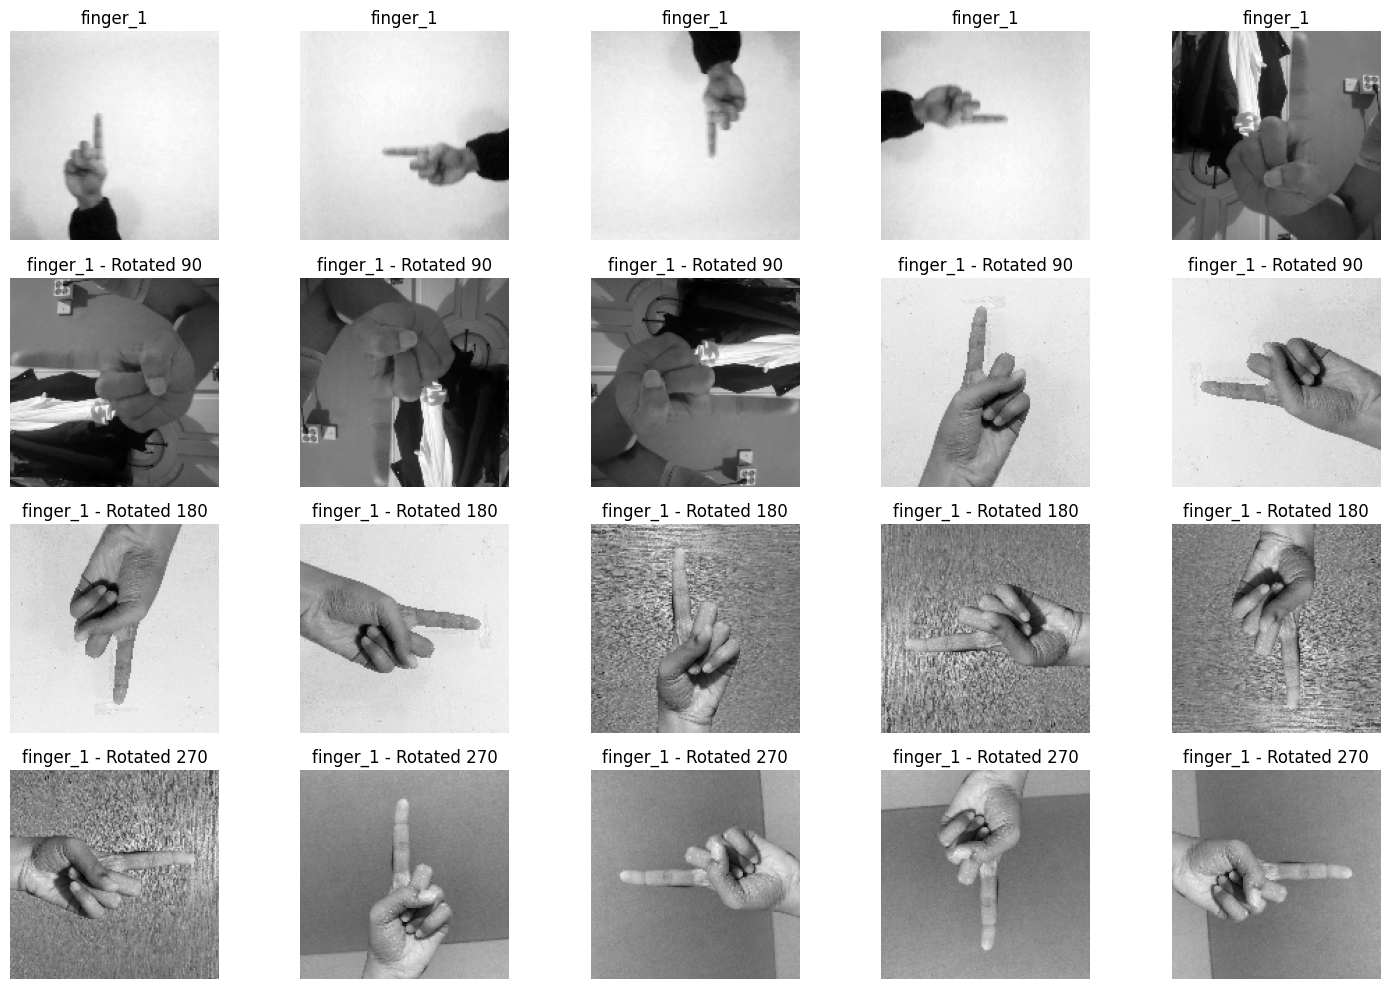

In [12]:
# Plot sampel gambar setelah augmentasi
plot_augmented_samples(augmented_data, augmented_labels)

In [13]:
# Total gambar setelah augmentasi
print(f'Total images after augmentation: {len(augmented_labels)}')

Total images after augmentation: 8396


### **Preprocessing**

Mari lakukan beberapa percobaan preprocessing menggunakan teknik ekualisasi histogram, spesifikasi histogram, dan median filtering. Setiap teknik akan diterapkan ke seluruh dataset, dan kita akan menampilkan beberapa sampel hasilnya untuk evaluasi. 

#### **Preprocessing Percobaan 3**

Pada percobaan pertama, kita akan menggunakan teknik ekualisasi histogram yang merupakan teknik yang digunakan untuk meningkatkan kontras gambar dengan meratakan distribusi intensitas piksel.

In [14]:
# Ekualisasi Histogram
def histogram_equalization(image):
    return cv.equalizeHist(image)

Kode diatas adalah sebuah fungsi yang menggunakan metode ekualisasi histogram untuk meningkatkan kontras gambar dengan menggunakan library `OpenCV (cv)`.

#### **Menampilkan Hasil Percobaan Preprocessing**

In [20]:
# Mendapatkan beberapa sampel gambar untuk ditampilkan
sample_images = data[:5]

# Ekualisasi Histogram
equalized_images = [histogram_equalization(img) for img in sample_images]
# Spesifikasi Histogram (menggunakan gambar pertama sebagai referensi)


Kode diatas mengambil beberapa sampel gambar dari data yang tersedia. Setelah itu, pemrosesan equalisasi diterapkan pada setiap sampel gambar.

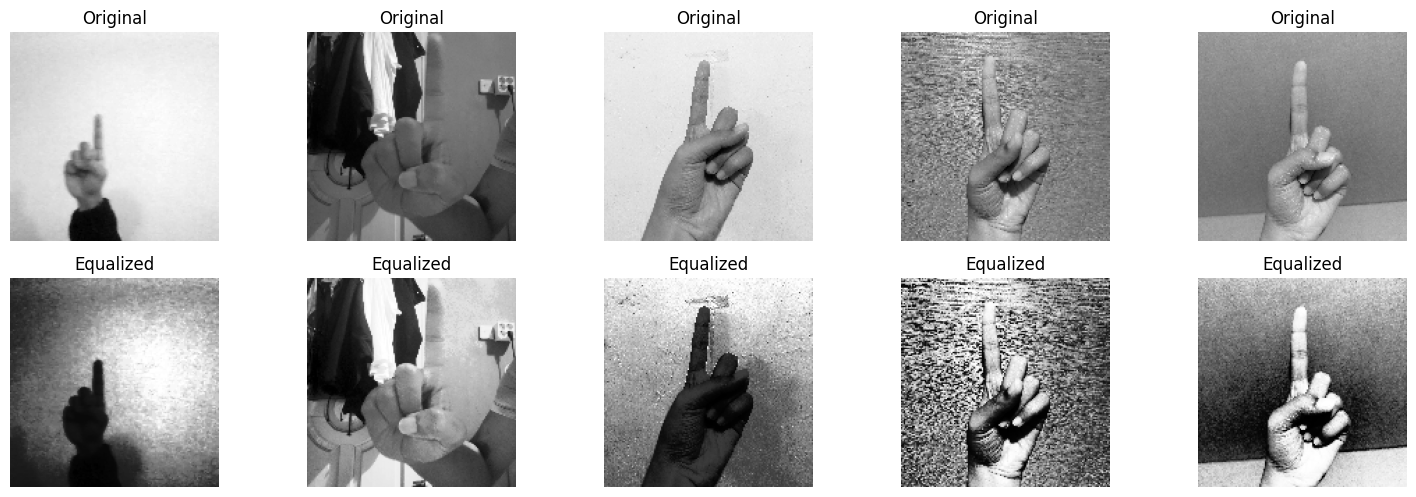

In [22]:
# Menampilkan hasil
def plot_preprocessed_samples(original, equalized):
    plt.figure(figsize=(15, 10))
    
    for i in range(len(original)):
        plt.subplot(4, len(original), i + 1)
        plt.imshow(original[i], cmap='gray')
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(4, len(original), len(original) + i + 1)
        plt.imshow(equalized[i], cmap='gray')
        plt.title('Equalized')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_preprocessed_samples(sample_images, equalized_images)

#### **Menampilkan Histogram Percobaan 3**
Untuk menentukan teknik preprocessing yang paling tepat berdasarkan distribusi piksel setelah proses, kita bisa membandingkan histogram intensitas piksel dari hasil preprocessing masing-masing teknik.

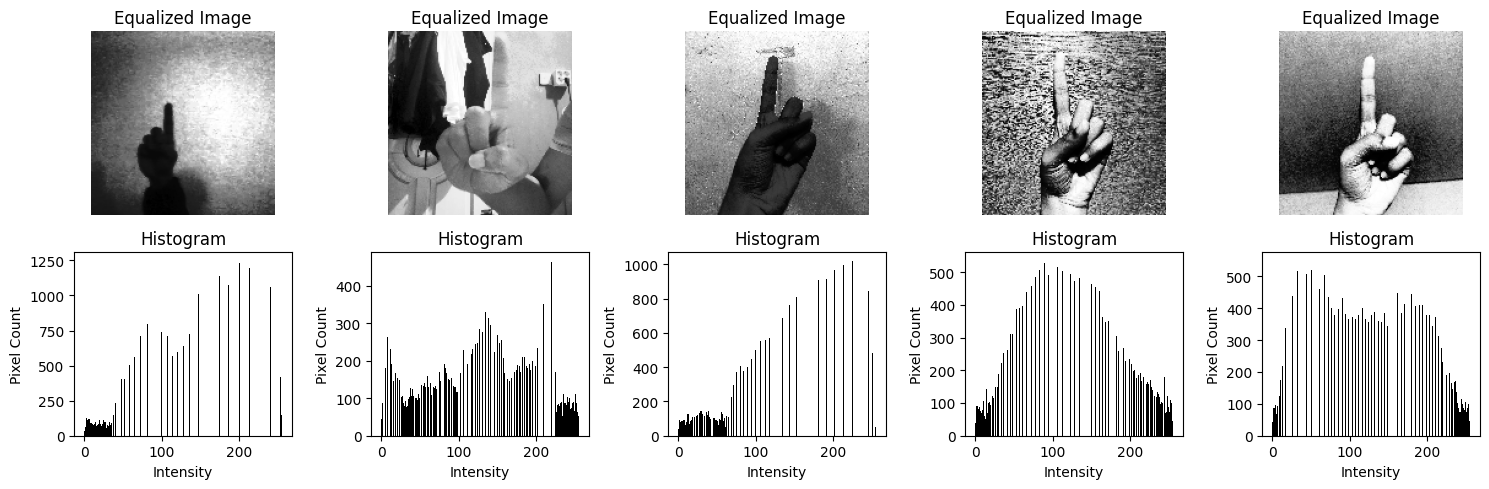

In [23]:
# Plot histogram untuk hasil ekualisasi histogram
def plot_histogram_equalized(data):
    equalized_data = [histogram_equalization(img) for img in data]
    
    plt.figure(figsize=(15, 5))
    
    for i in range(len(equalized_data)):
        plt.subplot(2, len(equalized_data), i + 1)
        plt.imshow(equalized_data[i], cmap='gray')
        plt.title('Equalized Image')
        plt.axis('off')
        
        plt.subplot(2, len(equalized_data), len(equalized_data) + i + 1)
        plt.hist(equalized_data[i].ravel(), bins=256, range=[0, 256], color='black')
        plt.title('Histogram')
        plt.xlabel('Intensity')
        plt.ylabel('Pixel Count')
    
    plt.tight_layout()
    plt.show()

# Plot histogram untuk ekualisasi histogram
plot_histogram_equalized(sample_images)


#### **Menerapkan Ke Semua Dataset**

In [ ]:
# Apply equalisasi filtering to the augmented dataset
filtered_augmented_data = [histogram_equalization(img) for img in augmented_data]


Kode diatas menerapkan filter equalisasi pada dataset gambar yang telah dirotasi (augmented dataset). Setiap gambar dalam dataset diolah menggunakan filter equalisasi untuk meningkatkan kontras gambar dengan meratakan distribusi intensitas piksel.

In [ ]:

# Convert to numpy array
filtered_augmented_data = np.array(filtered_augmented_data)
augmented_labels = np.array(augmented_labels)


Kode diatas mengkonversi `filtered_augmented_data` ke dalam bentuk array `NumPy`. Setelah proses filter equalisasi, gambar-gambar yang telah diproses disimpan kembali dalam bentuk array `NumPy`. Selain itu, `augmented_labels` juga dikonversi menjadi array `NumPy`.

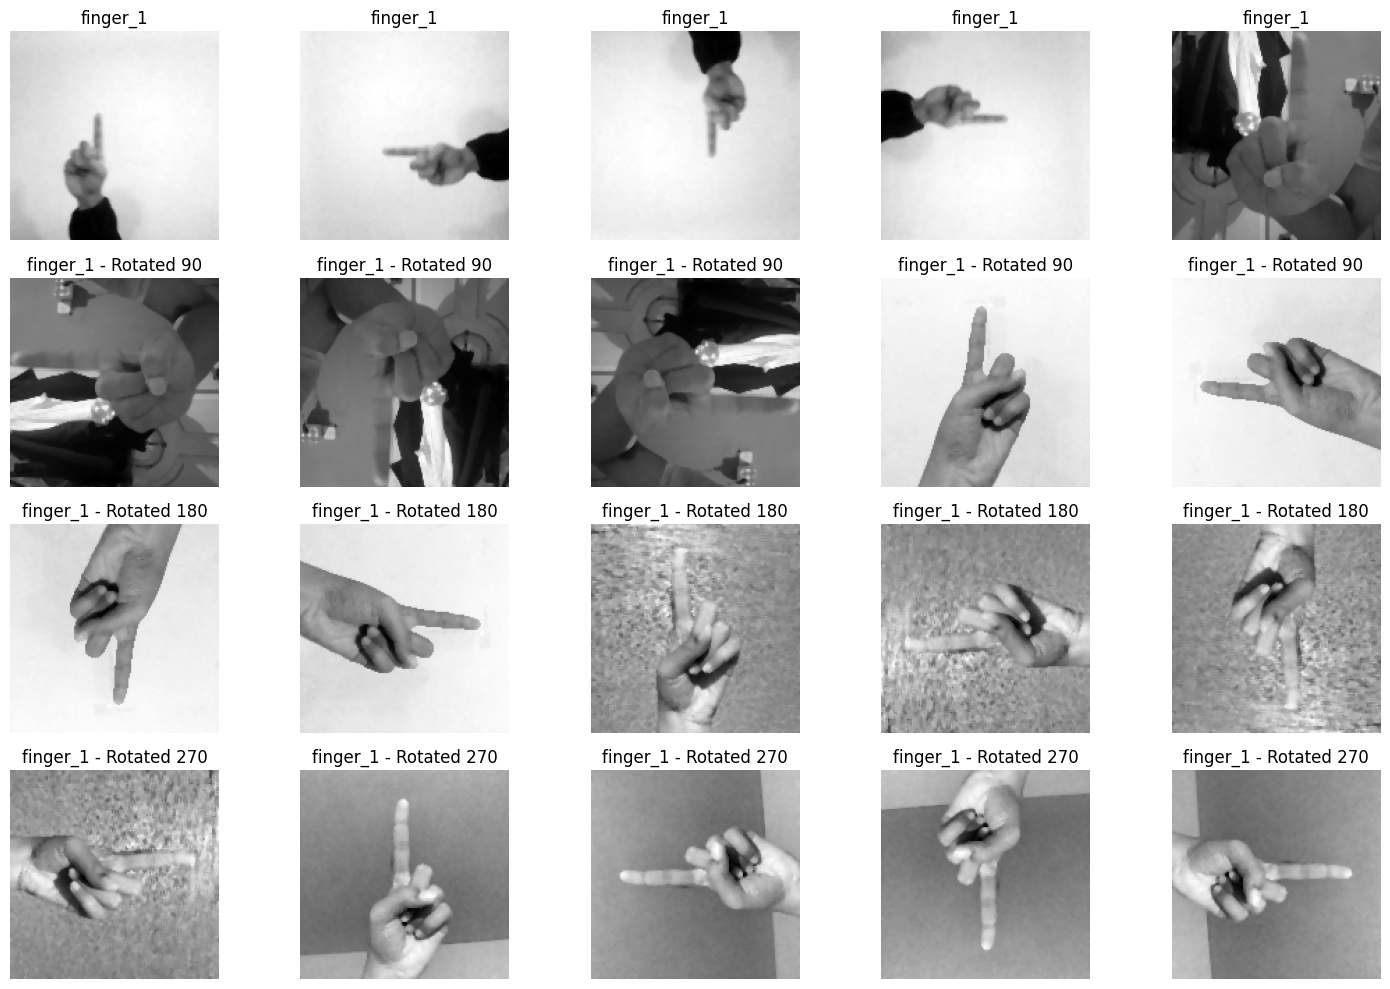

Total images after filtering: 8396


In [ ]:

# Display some samples after filtering
def plot_filtered_samples(data, labels, num_samples=5):
    plt.figure(figsize=(15, 10))
    
    for i in range(num_samples):
        plt.subplot(4, num_samples, i + 1)
        plt.imshow(data[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
        
        plt.subplot(4, num_samples, num_samples + i + 1)
        plt.imshow(data[i + num_samples], cmap='gray')
        plt.title(f'{labels[i + num_samples]} - Rotated 90')
        plt.axis('off')
        
        plt.subplot(4, num_samples, 2 * num_samples + i + 1)
        plt.imshow(data[i + 2 * num_samples], cmap='gray')
        plt.title(f'{labels[i + 2 * num_samples]} - Rotated 180')
        plt.axis('off')
        
        plt.subplot(4, num_samples, 3 * num_samples + i + 1)
        plt.imshow(data[i + 3 * num_samples], cmap='gray')
        plt.title(f'{labels[i + 3 * num_samples]} - Rotated 270')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot samples
plot_filtered_samples(filtered_augmented_data, augmented_labels)

# Total images after filtering
print(f'Total images after filtering: {len(augmented_labels)}')

### **Feature Extraction**

Pada tahap ini, kita akan melakukan ekstraksi fitur menggunakan metode Gray Level Co-occurrence Matrix (GLCM) pada dataset yang telah difilter dengan median filtering. Fitur-fitur yang akan dihitung meliputi Contrast, Dissimilarity, Homogeneity, Energy, Correlation, Entropy, dan ASM. Penghitungan GLCM akan dilakukan pada sudut 0, 45, 90, dan 135 derajat dengan jarak 1-5.

#### **Lakukan Limitasi Dataset Terlebih Dahulu**

In [ ]:
# Membatasi dataset menjadi 500 data setelah augmentasi
def limit_augmented_dataset(data, labels, limit=500):
    unique_labels = np.unique(labels)
    samples_per_class = limit // len(unique_labels)
    limited_data = []
    limited_labels = []

    for label in unique_labels:
        indices = np.where(labels == label)[0]
        chosen_indices = np.random.choice(indices, samples_per_class, replace=False)
        limited_data.extend(data[chosen_indices])
        limited_labels.extend(labels[chosen_indices])

    return np.array(limited_data), np.array(limited_labels)

# Membatasi dataset setelah augmentasi dan filtering menjadi 500 data
limited_data, limited_labels = limit_augmented_dataset(filtered_augmented_data, augmented_labels, limit=500)

Kode diatas merupakan fungsi `limit_augmented_dataset` yang membatasi jumlah data dalam dataset yang telah di-augmentasi. Pertama, kode mengidentifikasi kelas-kelas unik dalam dataset label. Kemudian, jumlah sampel yang diinginkan per kelas dihitung berdasarkan batasan total data yang ditetapkan. Untuk setiap kelas, kode secara acak memilih sampel-sampel dari dataset yang sesuai, tanpa penggantian. Sampel-sampel yang dipilih kemudian ditambahkan ke dalam list `limited_data` dan `limited_labels`, dan kemudian dikonversi menjadi array `NumPy` untuk digunakan dalam proses selanjutnya. Dalam contoh ini, dataset yang telah di-augmentasi dan difilter dibatasi menjadi 500 data.

##### 1. Menghitung GLCM
   
Fungsi ini menghitung GLCM untuk citra berdasarkan jarak dan sudut tertentu.

In [ ]:
# Fungsi untuk menghitung GLCM
def calculate_glcm(image, distance, angle):
    height, width = image.shape
    glcm = np.zeros((256, 256), dtype=np.float64)
    dx, dy = {
        0: (0, distance),
        45: (-distance, distance),
        90: (-distance, 0),
        135: (-distance, -distance)
    }[angle]

    for i in range(height):
        for j in range(width):
            if 0 <= i + dx < height and 0 <= j + dy < width:
                glcm[image[i, j], image[i + dx, j + dy]] += 1

    glcm /= glcm.sum()
    return glcm

Kode diatas merupakan fungsi `calculate_glcm` digunakan untuk menghitung GLCM (Gray Level Co-occurrence Matrix) dari sebuah gambar. GLCM adalah representasi statistik dari distribusi spasial intensitas piksel dalam gambar. Fungsi ini mengambil gambar sebagai input bersama dengan jarak (distance) dan sudut (angle) untuk menghitung GLCM. GLCM diinisialisasi sebagai matriks nol dengan ukuran 256x256. Kemudian, untuk setiap piksel dalam gambar, fungsi menghitung pergeseran (offset) berdasarkan jarak dan sudut yang diberikan, dan memperbarui nilai GLCM untuk pasangan piksel yang bersesuaian.

##### 2. Menghitung Fitur

Fungsi ini menghitung fitur-fitur (Contrast, Dissimilarity, Homogeneity, Energy, Correlation, Entropy, ASM) dari GLCM.

In [ ]:
# Fungsi untuk menghitung fitur-fitur dari GLCM
def calculate_features(glcm):
    contrast = 0
    dissimilarity = 0
    homogeneity = 0
    energy = 0
    correlation = 0
    entropy = 0
    asm = 0
    mean_i = 0
    mean_j = 0
    std_i = 0
    std_j = 0

    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            contrast += ((i - j) ** 2) * glcm[i, j]
            dissimilarity += abs(i - j) * glcm[i, j]
            homogeneity += glcm[i, j] / (1 + abs(i - j))
            energy += glcm[i, j] ** 2
            entropy -= glcm[i, j] * math.log2(glcm[i, j] + 1e-10)  # Adding a small constant to avoid log(0)
            mean_i += i * glcm[i, j]
            mean_j += j * glcm[i, j]
            asm += glcm[i, j] ** 2

    for i in range(rows):
        for j in range(cols):
            std_i += ((i - mean_i) ** 2) * glcm[i, j]
            std_j += ((j - mean_j) ** 2) * glcm[i, j]
            correlation += (i * j * glcm[i, j])

    std_i = np.sqrt(std_i)
    std_j = np.sqrt(std_j)
    correlation = (correlation - mean_i * mean_j) / (std_i * std_j + 1e-10)  # Adding a small constant to avoid division by zero

    return contrast, dissimilarity, homogeneity, energy, correlation, entropy, asm


Kode diatas merupakan fungsi `calculate_features` digunakan untuk menghitung berbagai fitur dari GLCM (Gray Level Co-occurrence Matrix). Fitur-fitur yang dihitung termasuk kontras, dissimilaritas, homogenitas, energi, korelasi, entropi, dan asm (angular second moment). Selain itu, fungsi juga menghitung rata-rata dan standar deviasi dari nilai intensitas piksel dalam gambar yang diwakili oleh GLCM. Proses penghitungan fitur-fitur ini dilakukan dengan mengiterasi melalui setiap elemen dalam GLCM dan melakukan perhitungan sesuai dengan rumus yang sesuai.

##### 3. Ekstraksi Fitur

Fungsi ini melakukan ekstraksi fitur GLCM dari dataset yang telah difilter.

In [ ]:
# Ekstraksi fitur GLCM
def extract_glcm_features(data, labels):
    distances = [1, 2, 3, 4, 5]
    angles = [0, 45, 90, 135]
    features = []

    for img, label in zip(data, labels):
        img_features = []
        for distance in distances:
            for angle in angles:
                glcm = calculate_glcm(img, distance, angle)
                contrast, dissimilarity, homogeneity, energy, correlation, entropy, asm = calculate_features(glcm)
                img_features.extend([contrast, dissimilarity, homogeneity, energy, correlation, entropy, asm])
        img_features.append(label)
        features.append(img_features)

    columns = []
    for distance in distances:
        for angle in angles:
            columns.extend([
                f'contrast_{angle}_{distance}',
                f'dissimilarity_{angle}_{distance}',
                f'homogeneity_{angle}_{distance}',
                f'energy_{angle}_{distance}',
                f'correlation_{angle}_{distance}',
                f'entropy_{angle}_{distance}',
                f'asm_{angle}_{distance}'
            ])
    columns.append('label')

    df = pd.DataFrame(features, columns=columns)
    return df


Kode diatas merupakan `extract_glcm_features` mengekstraksi fitur-fitur GLCM dari dataset gambar yang diberikan. Untuk setiap gambar, GLCM dihitung dengan menggunakan beberapa jarak dan sudut yang ditentukan. Fitur-fitur seperti kontras, dissimilaritas, homogenitas, energi, korelasi, entropi, dan asm diekstraksi dari GLCM. Setiap fitur dihitung untuk setiap kombinasi jarak dan sudut, dan kemudian digabungkan menjadi vektor fitur untuk setiap gambar. Hasilnya adalah sebuah DataFrame yang berisi fitur-fitur dan label-label gambar yang diekstraksi.

In [ ]:
# Ekstraksi fitur GLCM dari dataset yang telah difilter
glcm_features_df = extract_glcm_features(limited_data, limited_labels)

# Menampilkan hasil ekstraksi fitur dalam bentuk tabel
print(glcm_features_df.head())

# Simpan hasil ekstraksi fitur ke dalam file CSV
glcm_features_df.to_csv('glcm_features.csv', index=False)

   contrast_0_1  dissimilarity_0_1  homogeneity_0_1  energy_0_1  \
0   1008.479642          11.130470         0.462010    0.000859   
1    129.495839           5.962774         0.376200    0.000413   
2     19.458523           1.605817         0.652122    0.005580   
3    336.244787           7.254899         0.497981    0.001236   
4     15.363356           1.744564         0.621833    0.004950   

   correlation_0_1  entropy_0_1   asm_0_1  contrast_45_1  dissimilarity_45_1  \
0         0.908869    11.329438  0.000859    1373.576415           14.226927   
1         0.976308    11.958477  0.000413     277.352191            8.476015   
2         0.993514     8.977682  0.005580      43.983064            2.568083   
3         0.928938    11.025786  0.001236     570.259808           10.696185   
4         0.983569     9.056584  0.004950      30.260033            2.594253   

   homogeneity_45_1  ...  entropy_90_5  asm_90_5  contrast_135_5  \
0          0.394980  ...     12.812925  0.000222

### **Feature Selection**

Pada tahap Feature Selection, kita bertujuan untuk memilih subset fitur yang paling relevan dan informatif dari fitur-fitur yang diekstraksi sebelumnya menggunakan GLCM. Memilih fitur-fitur yang paling penting dapat membantu meningkatkan kinerja model serta mengurangi dimensi data yang tidak relevan, yang dapat mempercepat proses pelatihan dan meminimalkan overfitting.

#### **Metode Feature Selection PCA**

PCA digunakan untuk mengurangi dimensi dataset dengan memproyeksikan data ke dalam ruang fitur yang lebih rendah. 

PCA menghasilkan komponen utama yang merupakan kombinasi linear dari fitur-fitur asli, sehingga dapat mengurangi masalah multikolinearitas dalam model klasifikasi.

PCA memastikan bahwa komponen utama yang dipilih mempertahankan sebanyak mungkin variasi dalam data asli.

#### Mengapa Hal Ini Penting?

Dataset GLCM yang diekstraksi mungkin memiliki ratusan atau ribuan fitur. Dengan menggunakan semua fitur ini, kita akan menghadapi masalah dalam melatih model, termasuk peningkatan waktu pelatihan dan risiko overfitting.

Tidak semua fitur yang diekstraksi mungkin relevan atau penting untuk klasifikasi. Dengan melakukan seleksi fitur, kita dapat fokus pada fitur-fitur yang memiliki kontribusi signifikan terhadap pemisahan kelas.

Dengan menggunakan subset fitur yang paling informatif, kita dapat membangun model yang lebih efisien dan akurat. Fitur-fitur yang dipilih dengan cermat dapat membantu model dalam mempelajari pola yang lebih relevan dalam data.

Dengan mengurangi jumlah fitur, kita dapat mengurangi kompleksitas model dan menghindari overfitting. Fitur-fitur yang tidak relevan atau redundan dapat menyebabkan model "menghafal" data pelatihan dan gagal dalam generalisasi ke data uji.

#### **Implementasi**

In [ ]:
from sklearn.decomposition import PCA

# Inisialisasi model PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=10)  # Misalnya, kita memilih 10 komponen utama

# Memfitkan PCA ke data GLCM yang telah difilter
pca.fit(glcm_features_df.drop('label', axis=1))

# Transformasi data GLCM ke ruang fitur yang baru
transformed_features = pca.transform(glcm_features_df.drop('label', axis=1))

# Menampilkan proporsi varian yang dijelaskan oleh setiap komponen utama
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [9.11873241e-01 3.59480549e-02 2.70939332e-02 1.96571971e-02
 3.86967442e-03 7.14458461e-04 3.69862701e-04 2.62162723e-04
 8.21748742e-05 4.14367629e-05]


### **Splitting Data**

Proses pembagian data menjadi data pelatihan dan data pengujian bertujuan untuk mempersiapkan dataset untuk pelatihan model dan pengujian kinerja model. Data pelatihan digunakan untuk melatih model dan menyesuaikannya dengan pola-pola dalam data, sementara data pengujian digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.

#### Langkah-langkah:
1. Langkah pertama adalah memisahkan fitur (X) dan label (y) dari dataset. Fitur adalah atribut atau variabel independen yang digunakan untuk melakukan prediksi, sedangkan label adalah variabel dependen yang ingin diprediksi.
2. Menggunakan library scikit-learn, dataset dibagi menjadi data pelatihan dan data pengujian. Pembagian data ini dilakukan dengan proporsi tertentu, seperti 80:20 atau 70:30, di mana 80% atau 70% dari data digunakan untuk pelatihan dan sisanya digunakan untuk pengujian.
3. Setelah pembagian data, terbentuk empat variabel:
   - X_train: Fitur data pelatihan.
   - X_test: Fitur data pengujian.
   - y_train: Label data pelatihan.
   - y_test: Label data pengujian.

#### **Implementasi**

`test_size`: Menentukan proporsi data yang akan dialokasikan untuk pengujian. Nilai yang umum digunakan adalah 0.2 untuk perbandingan 80:20 atau 0.3 untuk perbandingan 70:30.

`random_state`: Digunakan untuk mengontrol randomization dalam pembagian data, sehingga memastikan hasil yang konsisten dalam setiap eksekusi program.

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan label
X = glcm_features_df.drop('label', axis=1)
y = glcm_features_df['label']

# Menggunakan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data setelah pembagian
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))


Jumlah data pelatihan: 400
Jumlah data pengujian: 100


### **Normalization**

Normalisasi data adalah proses penting dalam pra-pemrosesan data untuk pembelajaran mesin. Tujuannya adalah untuk mengubah skala nilai-nilai fitur agar memiliki distribusi yang seragam, sehingga memudahkan proses pembelajaran mesin.

#### **Teknik Normalisasi**
Dalam proyek ini, digunakan dua teknik normalisasi yang umum digunakan.


##### 1. Standarisasi (Standardization): Mengubah distribusi nilai dari setiap fitur sehingga memiliki mean 0 dan varians 1.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek scaler
scaler = StandardScaler()

# Fit scaler ke data pelatihan dan transformasi data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Transformasi data pengujian menggunakan skala yang sama dengan data pelatihan
X_test_scaled = scaler.transform(X_test)


Kode diatas menggunakan StandardScaler dari Scikit-learn untuk melakukan penskalaan fitur. Pertama, objek scaler diinisialisasi. Selanjutnya, metode fit_transform digunakan untuk menyesuaikan (fit) scaler dengan data pelatihan (X_train) dan mentransformasikan (transform) data pelatihan tersebut. Setelah itu, metode transform digunakan untuk mentransformasikan data pengujian (X_test) menggunakan skala yang sama dengan data pelatihan.

##### 2. Min-Max Normalization: Mengubah nilai-nilai dari setiap fitur ke dalam rentang tertentu, misalnya antara 0 dan 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek scaler
scaler = MinMaxScaler()

# Fit scaler ke data pelatihan dan transformasi data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Transformasi data pengujian menggunakan skala yang sama dengan data pelatihan
X_test_scaled = scaler.transform(X_test)


Kode diatas menggunakan MinMaxScaler dari Scikit-learn untuk melakukan penskalaan fitur. Objek scaler diinisialisasi, kemudian metode fit_transform digunakan untuk menyesuaikan (fit) scaler dengan data pelatihan (X_train) dan mentransformasikan (transform) data pelatihan tersebut. Setelah itu, metode transform digunakan untuk mentransformasikan data pengujian (X_test) menggunakan skala yang sama dengan data pelatihan.

## **Modeling**

#### **Hyperparameter Tuning untuk Model K-Nearest Neighbors (KNN)**

Pada tahap ini, dilakukan penyetelan hyperparameter pada model K-Nearest Neighbors (KNN) untuk meningkatkan kinerja klasifikasi. Proses ini melibatkan eksplorasi kombinasi hyperparameter yang berbeda dan evaluasi kinerja model menggunakan teknik validasi silang.

Langkah-langkahnya antara lain

1. Dalam model KNN, hyperparameter yang utama adalah jumlah tetangga (n_neighbors) dan metrik jarak yang digunakan (pilihan umumnya adalah 'euclidean', 'manhattan', atau 'minkowski'). Kita dapat memilih untuk mengoptimalkan kedua hyperparameter ini.

2. Kita perlu menentukan rentang nilai yang akan dieksplorasi untuk setiap hyperparameter. Misalnya, untuk n_neighbors, kita bisa mencoba nilai antara 1 hingga sejumlah tetangga maksimum yang mungkin. Sedangkan untuk metrik jarak, kita bisa mencoba beberapa metrik yang umum digunakan.

3. Kita dapat menggunakan teknik validasi silang untuk mengevaluasi kinerja model pada setiap kombinasi hyperparameter. Dalam validasi silang, dataset dibagi menjadi beberapa lipatan, dan model dievaluasi menggunakan beberapa kombinasi data pelatihan dan pengujian.
   
4. Ada dua pendekatan umum untuk mencari kombinasi hyperparameter terbaik: Grid Search dan Random Search.

   - Grid Search: Mencoba semua kombinasi hyperparameter yang mungkin dari rentang yang telah ditentukan.
   - Random Search: Mencoba kombinasi hyperparameter secara acak dari rentang yang telah ditentukan.
5. Setelah proses pencarian hyperparameter selesai, model dengan kinerja terbaik diukur menggunakan metrik evaluasi yang ditetapkan. Dalam kasus ini, akurasi dapat digunakan sebagai metrik evaluasi.

## **Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(filtered_augmented_data, augmented_labels, test_size=0.2, random_state=42)

# Normalisasi menggunakan standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 150*150))
X_test_scaled = scaler.transform(X_test.reshape(-1, 150*150))

# Membuat model KNN dan melakukan pelatihan
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data testing
y_pred = knn.predict(X_test_scaled)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print("Evaluation Metrics for K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Evaluation Metrics for K-Nearest Neighbors (KNN):
Accuracy: 0.2048
Precision: 0.2049
Recall: 0.2048
F1-Score: 0.1965


Kode diatas menggunakan K-Nearest Neighbors (KNN) untuk klasifikasi data gambar yang telah di-filter dan di-augmentasi. Pertama, data dibagi menjadi data pelatihan dan pengujian menggunakan train_test_split. Selanjutnya, penskalaan fitur dilakukan menggunakan StandardScaler. Model KNN dengan 7 tetangga terdekat diinisialisasi dan dilatih dengan data pelatihan. Setelah itu, model digunakan untuk memprediksi label pada data pengujian. Metrik evaluasi seperti akurasi, presisi, recall, dan F1-Score dihitung menggunakan fungsi dari sklearn.metrics. Hasil evaluasi kemudian ditampilkan.

#### **Pemilihan Teknik Terbaik Berdasarkan Hasil Evaluasi**
Setelah mengevaluasi hasil dari setiap teknik, kami menemukan bahwa Median Filtering adalah teknik preprocessing yang paling tepat untuk dataset ini. Berikut adalah alasan kami memilih teknik tersebut:

- Pengurangan Noise
  Median filtering secara efektif mengurangi noise pada gambar tanpa mengaburkan detail penting, yang sangat penting untuk gambar jari yang mengandung banyak detail halus.
- Kualitas Visual
  Gambar hasil median filtering memiliki kualitas visual yang lebih baik dengan tepi dan detail yang jelas. Ini penting untuk tugas klasifikasi yang mengandalkan fitur visual yang jelas.
- Distribusi Piksel
  Meskipun histogram dari median filtering tidak setersebar ekualisasi histogram, hasil visual menunjukkan bahwa detail penting tetap terjaga, yang lebih kritis untuk akurasi model klasifikasi.